# МГТУ им. Н.Э.Баумана | ИУ5 | 6 семестр | ТМО | ЛР№4

https://github.com/ugapanyuk/courses_current/wiki/LAB_TMO_TREES

**Задание:**
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

## Теория

**Регрессия** - задача прогнозирования количественных переменных на основе данных. В основе регрессионного анализа лежит построение функциональной зависимости между одной или несколькими независимыми переменными и одной зависимой переменной.

**Классификация** — задача прогнозирования категориальных переменных на основе данных. Задача классификации заключается в назначении объекта одному из заранее заданных классов на основе его характеристик.

Градиентный спуск и линейные модели машинного обучения: https://github.com/ugapanyuk/courses_current/blob/main/notebooks/linear/linear.ipynb

Метод опорных векторов (SVM): https://github.com/ugapanyuk/courses_current/blob/main/notebooks/svm/svm.ipynb

Деревья решений: https://github.com/ugapanyuk/courses_current/blob/main/notebooks/trees/trees.ipynb


## Практика

Датасет: https://github.com/ongaunjie1/credit-score-prediction


### Загрузка и первичный анализ

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
df0 = pd.read_csv("/dataset.csv")
df0.info()
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14790 entries, 0 to 14789
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        14790 non-null  int64  
 1   annual_income              14790 non-null  float64
 2   num_bank_acc               14790 non-null  int64  
 3   num_credit_card            14790 non-null  int64  
 4   interest_rate              14790 non-null  int64  
 5   delay_from_due_date        14790 non-null  int64  
 6   outstanding_debt           14790 non-null  float64
 7   credit_history_age         14790 non-null  float64
 8   installment_per_month      14790 non-null  float64
 9   monthly_balance            14790 non-null  float64
 10  payment_of_min_amount_Yes  14790 non-null  bool   
 11  Predicted Credit Score     14790 non-null  int64  
dtypes: bool(1), float64(5), int64(6)
memory usage: 1.3 MB


,age,annual_income,num_bank_acc,num_credit_card,interest_rate,delay_from_due_date,outstanding_debt,credit_history_age,installment_per_month,monthly_balance,payment_of_min_amount_Yes,Predicted Credit Score
0,23,19114.12,3,4,3,3,809.98,22.90,49.57,186.27,False,2
1,24,19114.12,3,4,3,3,809.98,22.10,49.57,361.44,False,2
2,28,34847.84,2,4,6,3,605.03,27.40,18.82,303.36,False,2
3,28,34847.84,2,4,6,3,605.03,27.50,18.82,452.30,False,2
4,55,30689.89,2,5,4,5,632.46,17.11,16.42,425.73,False,1


* **age**	Age of the individual.	int64
* **annual_income**	Annual income of the individual.	float64
* **num_bank_acc**	Number of bank accounts owned.	int64
* **num_credit_card**	Number of credit cards owned.	int64
* **interest_rate**	Interest rate of credit card.	float64
* **delay_from_due_date**	Delayed days from payment's due date.	int64
* **outstanding_debt**	Amount of outstanding debt.	float64
* **credit_history_age**	Credit history age.	float64
* **payment_of_min_amount**	Indicates if the minimum amount is paid.	bool
* **installment_per_month**	Monthly installment amount.	float64
* **monthly_balance**	Monthly balance	float64
* **credit_score**	Credit score.	int64

### Разделение на обучающую и тестовую выборки

In [ ]:
dfX = df0.drop(columns=["Predicted Credit Score"])
dfY = df0["Predicted Credit Score"]

In [ ]:
print("\n=======X=======\n")
dfX.info()
dfX.head()

print("\n=======Y=======\n")
dfY.info()
dfY.head()


=======X=======

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14790 entries, 0 to 14789
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        14790 non-null  int64  
 1   annual_income              14790 non-null  float64
 2   num_bank_acc               14790 non-null  int64  
 3   num_credit_card            14790 non-null  int64  
 4   interest_rate              14790 non-null  int64  
 5   delay_from_due_date        14790 non-null  int64  
 6   outstanding_debt           14790 non-null  float64
 7   credit_history_age         14790 non-null  float64
 8   installment_per_month      14790 non-null  float64
 9   monthly_balance            14790 non-null  float64
 10  payment_of_min_amount_Yes  14790 non-null  bool   
dtypes: bool(1), float64(5), int64(5)
memory usage: 1.1 MB

=======Y=======

<class 'pandas.core.series.Series'>
RangeIndex: 14790 entries, 0 to 

,Predicted Credit Score
0,2
1,2
2,2
3,2
4,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(
    dfX, dfY, test_size=0.2, random_state=1)

In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(11832, 11)
(2958, 11)
(11832,)
(2958,)


### Линейная модель: логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(xTrain, yTrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(xTrain, yTrain)

SVC()

### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(xTrain, yTrain)

DecisionTreeClassifier()

### Оценка качества

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Logistic Regression
y_pred_logistic_regression = logistic_regression_model.predict(xTest)

logistic_regression_accuracy = accuracy_score(yTest, y_pred_logistic_regression)
logistic_regression_precision = precision_score(yTest, y_pred_logistic_regression, average="weighted")
logistic_regression_recall = recall_score(yTest, y_pred_logistic_regression, average="weighted")
logistic_regression_f1 = f1_score(yTest, y_pred_logistic_regression, average="weighted")

In [ ]:
# SVM

y_pred_svm = svm_model.predict(xTest)

svm_accuracy = accuracy_score(yTest, y_pred_svm)
svm_precision = precision_score(yTest, y_pred_svm, average='weighted')
svm_recall = recall_score(yTest, y_pred_svm, average='weighted')
svm_f1 = f1_score(yTest, y_pred_svm, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Decision Tree

y_pred_decision_tree = decision_tree_model.predict(xTest)

decision_tree_accuracy = accuracy_score(yTest, y_pred_decision_tree)
decision_tree_precision = precision_score(yTest, y_pred_decision_tree, average='weighted')
decision_tree_recall = recall_score(yTest, y_pred_decision_tree, average='weighted')
decision_tree_f1 = f1_score(yTest, y_pred_decision_tree, average='weighted')

In [ ]:
from tabulate import tabulate

data = [
    ['accuracy', round(logistic_regression_accuracy, 3), round(svm_accuracy, 3), round(decision_tree_accuracy, 3)],
    ['precision', round(logistic_regression_precision, 3), round(svm_precision, 3), round(decision_tree_precision, 3)],
    ['recall', round(logistic_regression_recall, 3), round(svm_recall, 3), round(decision_tree_recall, 3)],
    ['f1', round(logistic_regression_f1, 3), round(svm_f1, 3), round(decision_tree_f1, 3)]
]

headers = ['Метрика / модель', 'Logistic Regression', 'SVM', 'Decision tree']

print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+-----------------------+-------+-----------------+
| Метрика / модель   |   Logistic Regression |   SVM |   Decision tree |
+====================+=======================+=======+=================+
| accuracy           |                 0.675 | 0.67  |           0.888 |
+--------------------+-----------------------+-------+-----------------+
| precision          |                 0.666 | 0.603 |           0.888 |
+--------------------+-----------------------+-------+-----------------+
| recall             |                 0.675 | 0.67  |           0.888 |
+--------------------+-----------------------+-------+-----------------+
| f1                 |                 0.638 | 0.629 |           0.888 |
+--------------------+-----------------------+-------+-----------------+


### График, показывающий важность признаков в дереве решений

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

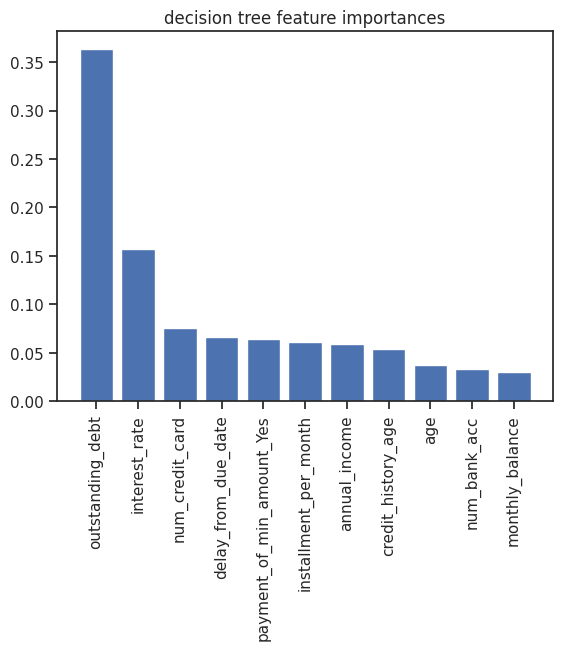

In [ ]:
feature_importances = decision_tree_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

names = [dfX.columns[i] for i in indices]

plt.figure()
plt.title("decision tree feature importances")
plt.bar(range(dfX.shape[1]), feature_importances[indices])
plt.xticks(range(dfX.shape[1]), names, rotation=90)
plt.show()

### Визуализация дерева решений

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
export_graphviz(decision_tree_model, out_file='/tree.dot', feature_names=dfX.columns, class_names=True, filled=True, rounded=True)

In [ ]:
# Вывод графа
with open("/tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [35]:
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [37]:
tree_rules = export_text(decision_tree_model, feature_names=list(dfX.columns))
print(tree_rules)

|--- outstanding_debt <= 1485.53
|   |--- interest_rate <= 20.50
|   |   |--- payment_of_min_amount_Yes <= 0.50
|   |   |   |--- num_credit_card <= 2.50
|   |   |   |   |--- delay_from_due_date <= 19.50
|   |   |   |   |   |--- credit_history_age <= 16.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- credit_history_age >  16.05
|   |   |   |   |   |   |--- num_bank_acc <= 6.00
|   |   |   |   |   |   |   |--- installment_per_month <= 31.26
|   |   |   |   |   |   |   |   |--- installment_per_month <= 30.14
|   |   |   |   |   |   |   |   |   |--- delay_from_due_date <= 13.50
|   |   |   |   |   |   |   |   |   |   |--- outstanding_debt <= 419.64
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- outstanding_debt >  419.64
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- delay_from_due_date >  13.50
|   |   |   |   |   |   |   |   |   |   |--- outstan